# Artificial Intelligence
**Tutorial week 1 - Search**
COMP3411/9814

## Introduction
In this tutorial, we will explore five different search algorithms: Depth-First Search (DFS), Breadth-First Search (BFS), Uniform Cost Search (UCS), Best-First Search, and A*. We will use NetworkX, a powerful Python library for creating, manipulating, and analysing complex graphs to construct the graph and evaluate the performance of each algorithm. Additionally, we will visualise the step-by-step iterations of these algorithms to provide a deeper understanding of their inner workings.

NetworkX is a versatile tool that allows us to easily create various types of graphs, perform complex operations on them, and visualize the results. It supports many graph theory-related algorithms, making it an ideal choice for this tutorial. Throughout this guide, NetworkX will help us to define graphs, implement search algorithms, and collect performance metrics efficiently.

To get started with NetworkX, ensure it is installed in your Python environment. You can install it via pip if you haven't already:

In [ ]:
!pip install networkx

## Search Algorithms

### Depth-First Search (DFS)

Depth-First Search (DFS) is an algorithm used for traversing or searching tree or graph data structures. The algorithm starts at the root node and explores as far as possible along each branch before backtracking. DFS uses a stack to keep track of the nodes to be visited next.

**Algorithm:**
1. Initialize a stack with the starting node and an empty path.
2. While the stack is not empty:
   - Pop a node and its path from the stack.
   - If the node has been visited, skip it.
   - Mark the node as visited.
   - Append the current node to the path.
   - If the goal is reached, return the path.
   - Add all unvisited neighbours to the stack.

### Breadth-First Search (BFS)

Breadth-First Search (BFS) is an algorithm for traversing or searching tree or graph data structures. It starts at the tree root (or some arbitrary node of a graph) and explores the neighbour nodes at the present depth prior to moving on to nodes at the next depth level. BFS uses a queue to keep track of the nodes to be visited next.

**Algorithm:**
1. Initialize a queue with the starting node and an empty path.
2. While the queue is not empty:
   - Dequeue a node and its path.
   - If the node has been visited, skip it.
   - Mark the node as visited.
   - Append the current node to the path.
   - If the goal is reached, return the path.
   - Add all unvisited neighbours to the queue.

### Uniform Cost Search (UCS)

Uniform Cost Search (UCS) is an algorithm used for finding the shortest path in a weighted graph where the cost of edges can vary. It expands the least cost node first, ensuring that the shortest path is found. UCS uses a priority queue to keep track of the nodes to be visited next, with priority given to nodes with the lowest cumulative cost.

**Algorithm:**
1. Initialize a priority queue with the starting node, cost 0, and an empty path.
2. While the queue is not empty:
   - Dequeue the node with the lowest cost.
   - If the node has been visited, skip it.
   - Mark the node as visited.
   - Append the current node to the path.
   - If the goal is reached, return the path and cost.
   - Add all unvisited neighbours to the priority queue with their cumulative cost.

### Best-First Search

Best-First Search is an algorithm that uses heuristics to guide the search process. It selects the node that appears to be closest to the goal according to the heuristic function. Best-First Search uses a priority queue to keep track of the nodes to be visited next, with priority given to nodes with the lowest heuristic value.

**Algorithm:**
1. Initialize a priority queue with the starting node, its heuristic value, and an empty path.
2. While the queue is not empty:
   - Dequeue the node with the lowest heuristic value.
   - If the node has been visited, skip it.
   - Mark the node as visited.
   - Append the current node to the path.
   - If the goal is reached, return the path.
   - Add all unvisited neighbours to the priority queue with their heuristic value.

### A* Search

A* Search is a widely used algorithm that combines the strengths of Uniform Cost Search and Best-First Search. It uses both the actual cost from the start and the heuristic cost to the goal to guide the search. A* uses a priority queue to keep track of the nodes to be visited next, with priority given to nodes with the lowest combined cost.

**Algorithm:**
1. Initialize a priority queue with the starting node, cost 0, its heuristic value, and an empty path.
2. While the queue is not empty:
   - Dequeue the node with the lowest cost + heuristic value.
   - If the node has been visited, skip it.
   - Mark the node as visited.
   - Append the current node to the path.
   - If the goal is reached, return the path and cost.
   - Add all unvisited neighbours to the priority queue with their cumulative cost + heuristic value.

## Experiments

### Step 1: Graph Definition

First, we will define an undirected graph with weighted edges using NetworkX. This graph will be used for all the algorithms to ensure a fair comparison.

In [1]:
# 3.1
import sys
import networkx as nx
from PyQt5.QtWidgets import QApplication
from visualiser import Visualiser
import heapq
import time
import pandas as pd

G = nx.Graph()
edges = [
    ("A", "B", 1),
    ("A", "C", 10),
    ("B", "D", 2),
    ("C", "D", 1),
    ("B", "E", 5),
    ("C", "F", 2),
    ("D", "E", 3),
    ("D", "F", 8),
    ("E", "G", 1),
    ("F", "G", 1),
    ("F", "H", 2),
    ("G", "H", 1),
]
for from_node, to_node, weight in edges:
    G.add_edge(from_node, to_node, weight=weight)

heuristic = {
    "A": 10,
    "B": 8,
    "C": 5,
    "D": 7,
    "E": 3,
    "F": 6,
    "G": 1,
    "H": 0,
}

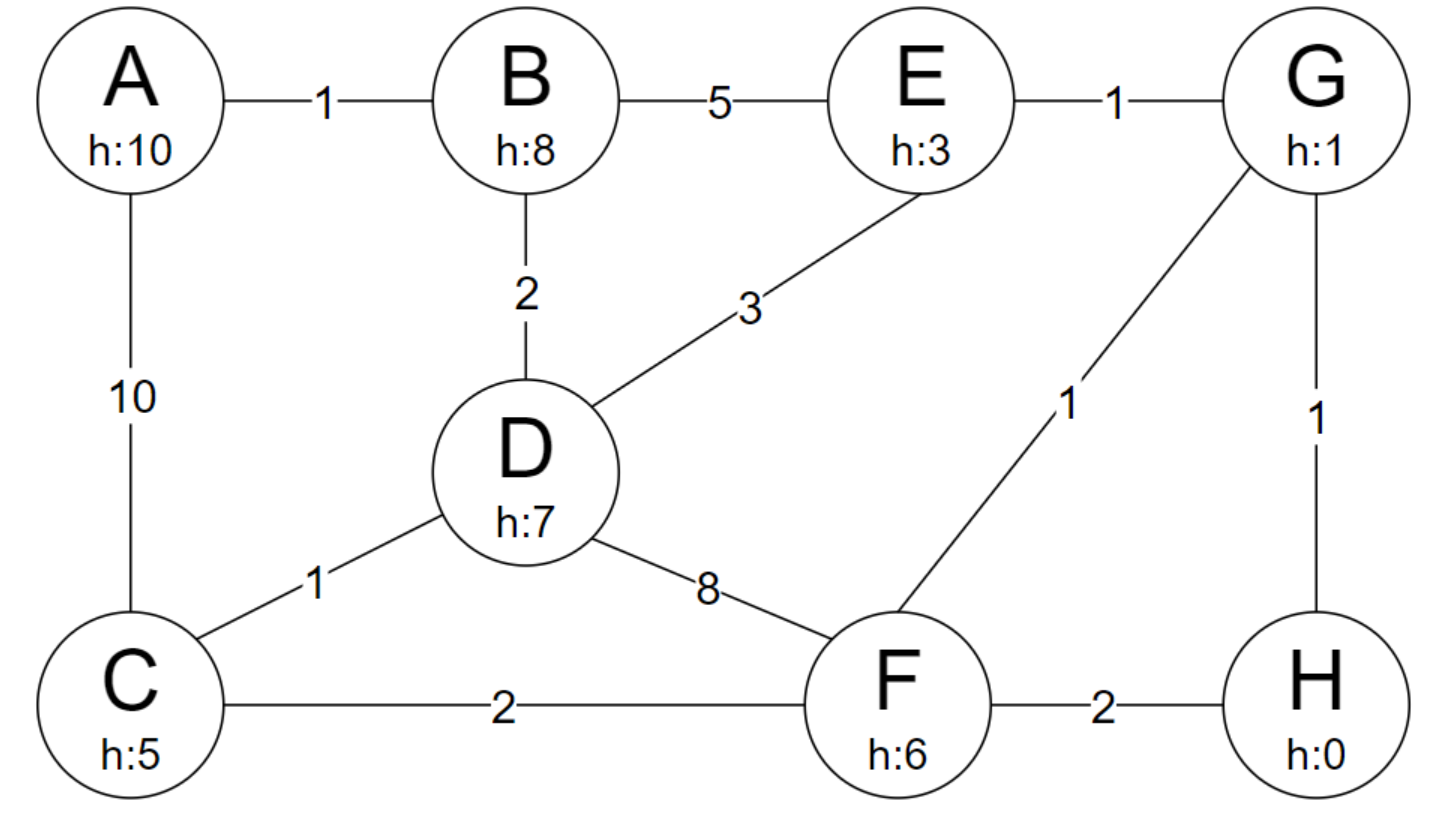

### Step 2: Algorithm Implementations

In this tutorial, each algorithm is provided with a skeleton code that you must complete by filling in the TODO parts. The algorithms are implemented to work with NetworkX graphs. Some of these algorithms rely on priority queues to efficiently manage the order in which nodes are explored. To implement priority queues in Python, we will use the `heapq` module, which provides an easy-to-use and efficient way to maintain a priority queue using a binary heap.

### Step 3: Visualisation

We will visualise each algorithm's step-by-step iterations to enhance understanding using a graphical user interface. For this purpose, we will utilise PyQt5, a library that allows us to create cross-platform GUI applications in Python. The visualisation will help illustrate how the algorithms explore the graph, make decisions at each step, and ultimately find the path to the goal.

Ensure PyQt5 is installed in your Python environment:

In [ ]:
!pip install PyQt5

### Step 4: Running the Algorithms and Collecting Metrics

To evaluate the performance of each search algorithm, we will use a helper function, `run_algorithm`, which automates the process of running the algorithms on the graph and collecting key metrics. This function takes care of executing the search algorithms, timing their execution, and calculating various performance metrics, including the path found, cost, node expansions, time complexity, and space complexity.

In [2]:
def run_algorithm(algorithm, graph, start, goal, heuristic=None):
    start_time = time.perf_counter()  # Record the start time
    # Run the algorithm, with or without heuristic as needed
    if algorithm in [DFS, BFS, UCS]:
        path, cost, node_expansions = algorithm(graph, start, goal)
    else:
        path, cost, node_expansions = algorithm(graph, start, goal, heuristic)
    end_time = time.perf_counter()  # Record the end time

    # Calculate performance metrics
    time_complexity = end_time - start_time
    space_complexity = len(path)

    # Return a dictionary with the collected metrics
    return {
        "path": path,
        "cost": cost,
        "node_expansions": node_expansions,
        "time_complexity": time_complexity,
        "space_complexity": space_complexity,
    }

Before we begin implementing the algorithms, it's crucial to first understand the key idea behind each one. The code below sets up a visualizer using PyQt5 to illustrate the behavior of each algorithm on the graph. This step-by-step visual explanation will help us grasp how each algorithm explores the graph, selects nodes, and constructs paths from the start node "A" to the goal node "H". This foundational understanding will ensure that we're well-prepared to implement each algorithm effectively.

In [ ]:
app = QApplication(sys.argv)
fixed_start = "A"
fixed_end = "H"
start = fixed_start
goal = fixed_end

viz = Visualiser(G, edges, heuristic, fixed_start, fixed_end)
viz.show()
# For .py please use the below line to exit the app
# sys.exit(app.exec_())
# For .ipynb please use the below line to exit the app
app.exec_()

### Tasks 1:
Fill in the TODO part in the DFS skeleton code to add all unvisited neighbours to the stack.

In [4]:
def DFS(graph, start, goal):
    # Initialize the stack with the starting node and an empty path
    stack = [(start, [])]
    # Set to keep track of visited nodes
    visited = set()
    # Counter to keep track of node expansions
    node_expansions = 0

    while stack:
        # Pop a node and its path from the stack
        node, path = stack.pop()

        # If the node has been visited, skip it
        if node in visited:
            continue

        # Mark the node as visited
        visited.add(node)

        # Append the current node to the path
        path = path + [node]

        # If the goal is reached, return the path, its length, and the number of node expansions
        if node == goal:
            return path, len(path), node_expansions

        # Increment the node expansions counter
        node_expansions += 1

        # TODO: Add all unvisited neighbors to the stack

    # If no path is found, return an empty list, infinity for path length, and the number of node expansions
    return [], float("inf"), node_expansions


In [ ]:
path, cost, node_expansions = DFS(G, start, goal)
print(path)

### Task 2:
Fill in the TODO part in the BFS skeleton code to add all unvisited neighbours to the queue.

In [7]:
def BFS(graph, start, goal):
    # Initialize the queue with the starting node and an empty path
    queue = [(start, [])]
    # Set to keep track of visited nodes
    visited = set()
    # Counter to keep track of node expansions
    node_expansions = 0

    while queue:
        # Dequeue a node and its path
        node, path = queue.pop(0)

        # If the node has been visited, skip it
        if node in visited:
            continue

        # Mark the node as visited
        visited.add(node)

        # Append the current node to the path
        path = path + [node]

        # If the goal is reached, return the path, its length, and the number of node expansions
        if node == goal:
            return path, len(path), node_expansions

        # Increment the node expansions counter
        node_expansions += 1

        # TODO: Add all unvisited neighbors to the queue

    # If no path is found, return an empty list, infinity for path length, and the number of node expansions
    return [], float("inf"), node_expansions

In [ ]:
path, cost, node_expansions = BFS(G, start, goal)
print(path)

### Task 3:
Fill in the TODO part in the UCS skeleton code to add all unvisited neighbours to the priority queue with their cumulative cost.

In [10]:
def UCS(graph, start, goal):
    # Initialize the priority queue with the starting node, cost 0, and an empty path
    queue = [(0, start, [])]
    # Set to keep track of visited nodes
    visited = set()
    # Counter to keep track of node expansions
    node_expansions = 0

    while queue:
        # Dequeue the node with the lowest cost
        cost, node, path = heapq.heappop(queue)

        # If the node has been visited, skip it
        if node in visited:
            continue

        # Mark the node as visited
        visited.add(node)

        # Append the current node to the path
        path = path + [node]

        # If the goal is reached, return the path, its length, and the number of node expansions
        if node == goal:
            return path, cost, node_expansions

        # Increment the node expansions counter
        node_expansions += 1

        # TODO: Add all unvisited neighbors to the priority queue with their cumulative cost

    # If no path is found, return an empty list, infinity for path length, and the number of node expansions
    return [], float("inf"), node_expansions


In [ ]:
path, cost, node_expansions = UCS(G, start, goal)
print(path)

### Task 4:
Fill in the TODO part in the Best-First Search skeleton code to add all unvisited neighbours to the priority queue with their heuristic value.

In [12]:
def best_first_search(graph, start, goal, heuristic):
    # Initialize the priority queue with the starting node, its heuristic value, and an empty path
    queue = [(heuristic[start], start, [])]
    # Set to keep track of visited nodes
    visited = set()
    # Counter to keep track of node expansions
    node_expansions = 0

    while queue:
        # Dequeue the node with the lowest heuristic value
        _, node, path = heapq.heappop(queue)

        # If the node has been visited, skip it
        if node in visited:
            continue

        # Mark the node as visited
        visited.add(node)

        # Append the current node to the path
        path = path + [node]

        # If the goal is reached, return the path, its length, and the number of node expansions
        if node == goal:
            return path, len(path), node_expansions

        # Increment the node expansions counter
        node_expansions += 1

        # TODO: Add all unvisited neighbors to the priority queue with their heuristic value

    # If no path is found, return an empty list, infinity for path length, and the number of node expansions
    return [], float("inf"), node_expansions

In [ ]:
path, cost, node_expansions = best_first_search(G, start, goal, heuristic)
print(path)

### Task 5:
Fill in the TODO part in the A* skeleton code to add all unvisited neighbours to the priority queue with their cumulative cost + heuristic value.

In [3]:
def a_star(graph, start, goal, heuristic):
    # Initialize the priority queue with the starting node, cost 0, its heuristic value, and an empty path
    queue = [(heuristic[start], 0, start, [])]
    # Set to keep track of visited nodes
    visited = set()
    # Counter to keep track of node expansions
    node_expansions = 0

    while queue:
        # Dequeue the node with the lowest cost + heuristic value
        _, cost, node, path = heapq.heappop(queue)

        # If the node has been visited, skip it
        if node in visited:
            continue

        # Mark the node as visited
        visited.add(node)

        # Append the current node to the path
        path = path + [node]

        # If the goal is reached, return the path, its length, and the number of node expansions
        if node == goal:
            return path, cost, node_expansions

        # Increment the node expansions counter
        node_expansions += 1

        # TODO: Add all unvisited neighbors to the priority queue with their cumulative cost + heuristic value

    # If no path is found, return an empty list, infinity for path length, and the number of node expansions
    return [], float("inf"), node_expansions

In [ ]:
path, cost, node_expansions = a_star(G, start, goal, heuristic)
print(path)

### Analysis:

In [ ]:
# Define the algorithms
algorithms = {
    "DFS": DFS,
    "BFS": BFS,
    "UCS": UCS,
    "Best-First Search": best_first_search,
    "A*": a_star,
}

# Define the metrics to store
metrics = ["path", "cost", "node_expansions", "time_complexity", "space_complexity"]
results = {metric: {} for metric in metrics}

# Run each algorithm once and store the metrics
for name, algorithm in algorithms.items():
    result = run_algorithm(algorithm, G, start, goal, heuristic)
    for metric in metrics:
        results[metric][name] = result[metric]

# Convert results to a DataFrame for each metric
df = pd.DataFrame.from_dict(results)
print(df)

## More Examples

![Screenshot 2024-09-16 141011.png](<attachment:Screenshot 2024-09-16 141011.png>)
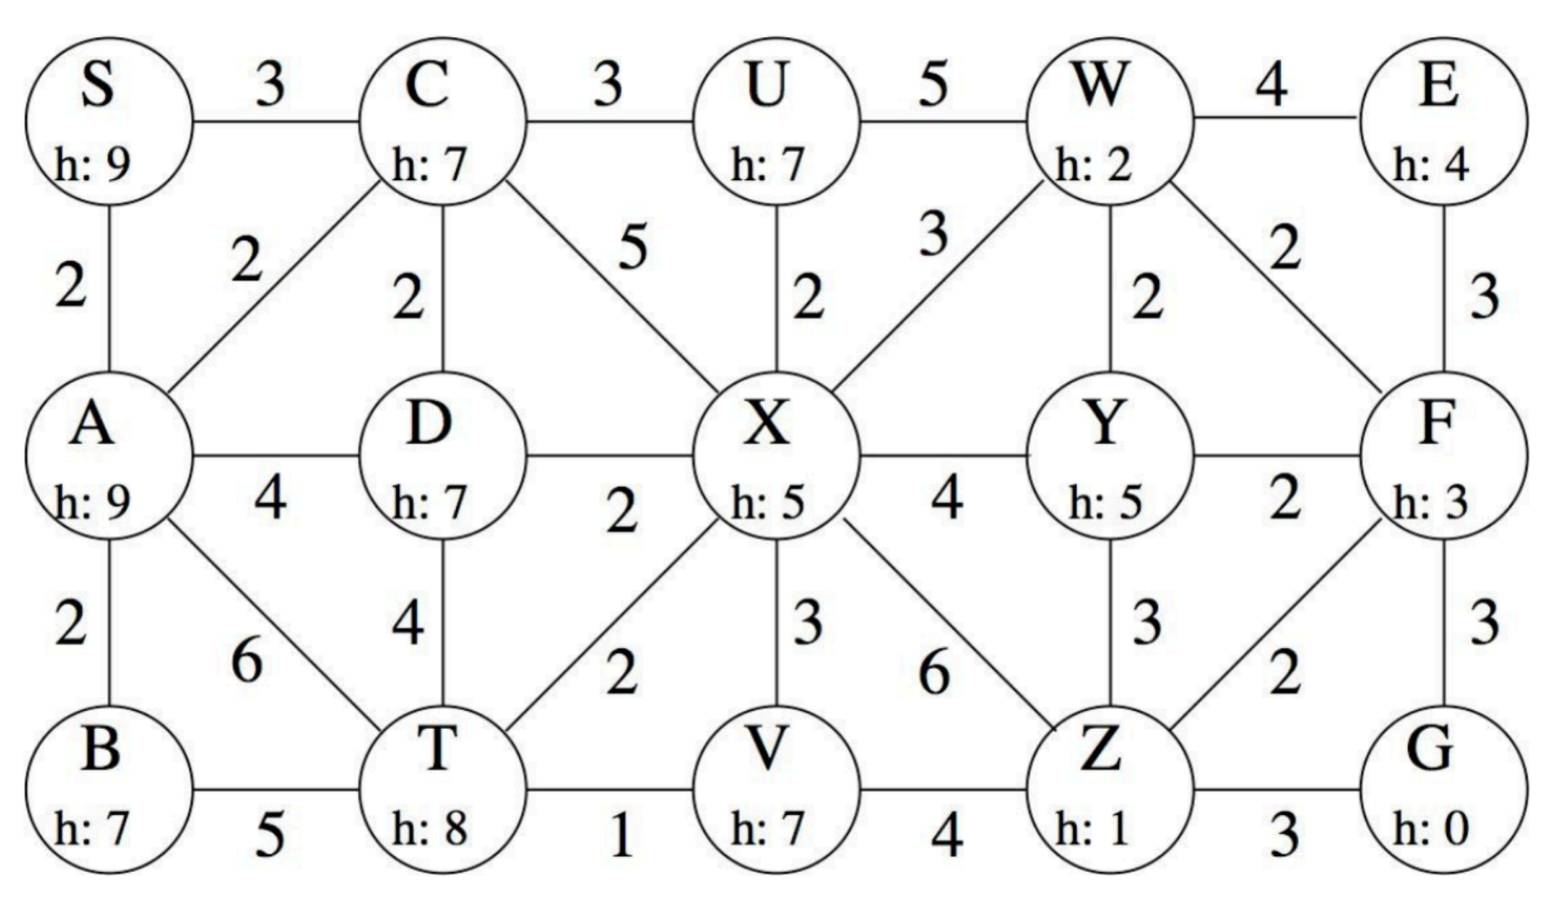

In [ ]:
# From additional material example
app = QApplication(sys.argv)
G = nx.Graph()

# Add edges with weights (representing cost)
edges = [
    ("S", "A", 2),
    ("S", "C", 3),
    ("A", "B", 2),
    ("A", "C", 2),
    ("A", "D", 4),
    ("A", "T", 6),
    ("B", "T", 5),
    ("C", "D", 2),
    ("C", "U", 3),
    ("C", "X", 5),
    ("D", "T", 4),
    ("D", "X", 2),
    ("E", "F", 3),
    ("E", "W", 4),
    ("F", "G", 3),
    ("F", "W", 2),
    ("F", "Y", 2),
    ("F", "Z", 2),
    ("G", "Z", 3),
    ("T", "V", 1),
    ("T", "X", 2),
    ("U", "W", 5),
    ("U", "X", 2),
    ("V", "X", 3),
    ("V", "Z", 4),
    ("W", "X", 3),
    ("W", "Y", 2),
    ("X", "Y", 4),
    ("X", "Z", 6),
    ("Y", "Z", 3),
]


G.add_weighted_edges_from(edges)

# Define the heuristic (straight-line distances to H)

heuristic = {
    "A": 9,
    "B": 7,
    "C": 7,
    "D": 7,
    "E": 4,
    "F": 3,
    "G": 0,
    "S": 9,
    "T": 8,
    "U": 7,
    "V": 7,
    "W": 2,
    "X": 5,
    "Y": 5,
    "Z": 1,
}

fixed_start = "S"
fixed_end = "G"

viz = Visualiser(G, edges, heuristic, fixed_start, fixed_end)
viz.show()
# For .py please use thi below line to exit the app
# sys.exit(app.exec_())
# For .ipynb please use the below line to exit the app
app.exec_()

![Screenshot 2024-09-16 141025.png](<attachment:Screenshot 2024-09-16 141025.png>)
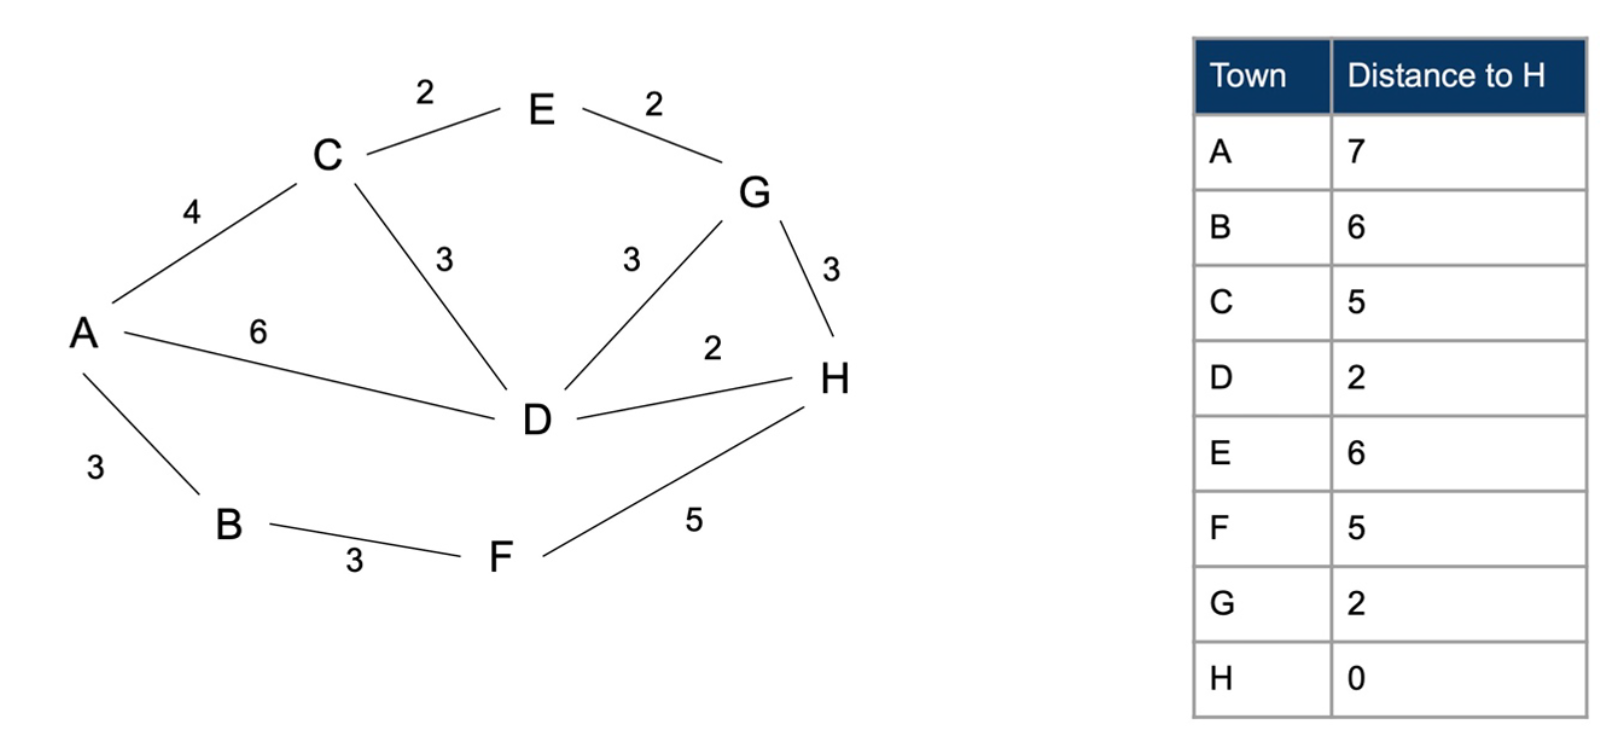

In [ ]:
# This is exam question 23T2
app = QApplication(sys.argv)
G = nx.Graph()

edges = [
    ("A", "B", 3),
    ("A", "C", 4),
    ("A", "D", 6),
    ("B", "A", 3),
    ("B", "F", 3),
    ("C", "A", 4),
    ("C", "E", 2),
    ("C", "D", 3),
    ("D", "A", 6),
    ("D", "C", 3),
    ("D", "G", 3),
    ("D", "H", 2),
    ("E", "C", 2),
    ("E", "G", 2),
    ("F", "B", 3),
    ("F", "H", 5),
    ("G", "D", 3),
    ("G", "E", 2),
    ("G", "H", 3),
    ("H", "D", 3),
    ("H", "F", 5),
    ("H", "G", 3),
]

G.add_weighted_edges_from(edges)

# Define the heuristic (straight-line distances to H)
heuristic = {"A": 7, "B": 6, "C": 5, "D": 2, "E": 6, "F": 5, "G": 2, "H": 0}

fixed_start = "A"
fixed_end = "H"

viz = Visualiser(G, edges, heuristic, fixed_start, fixed_end)
viz.show()
# For .py please use the below line to exit the app
# sys.exit(app.exec_())
# For .ipynb please use the below line to exit the app
app.exec_()

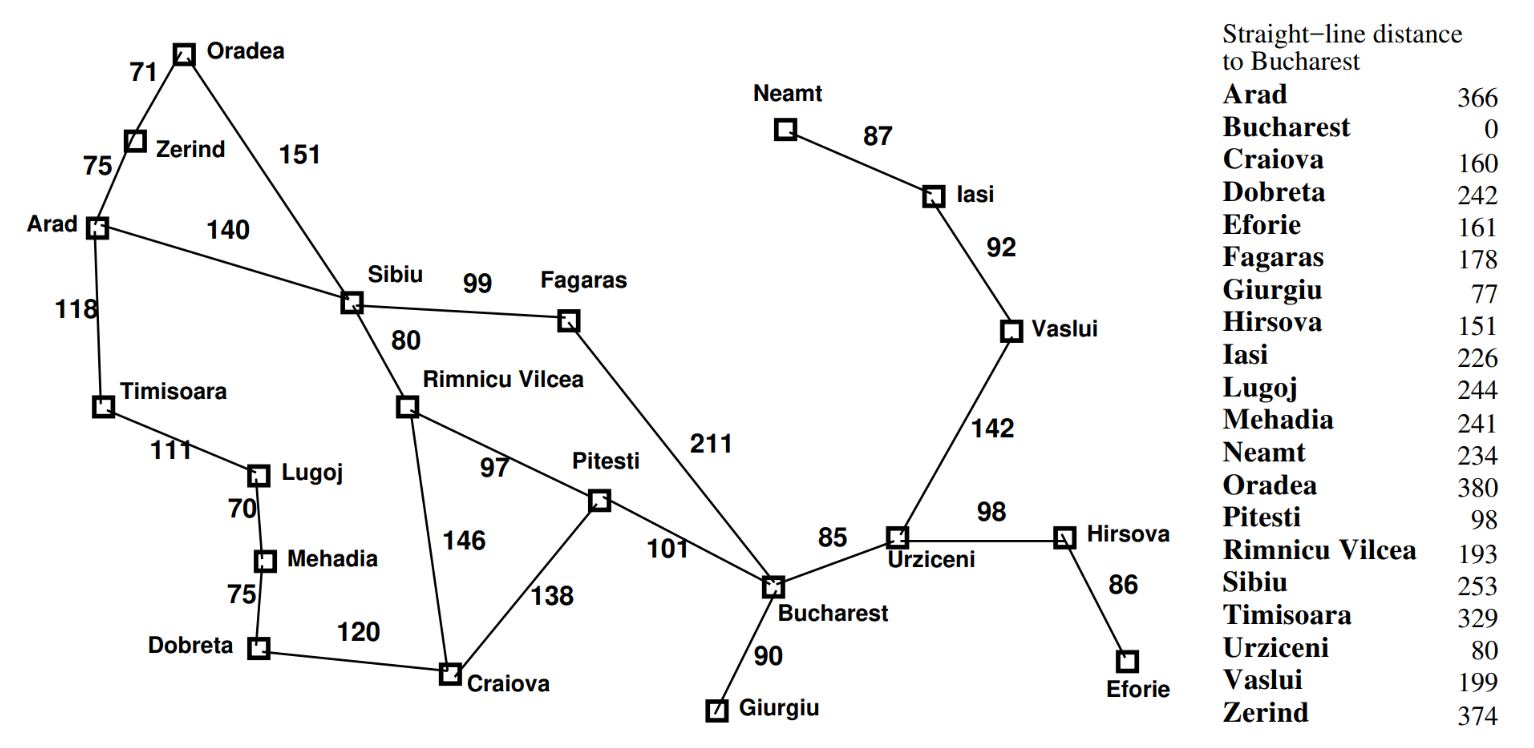

In [ ]:
# Example from lecture note
app = QApplication(sys.argv)
G = nx.Graph()

edges = [
    ("Arad", "Zerind", 75),
    ("Arad", "Sibiu", 140),
    ("Arad", "Timisoara", 118),
    ("Zerind", "Oradea", 71),
    ("Oradea", "Sibiu", 151),
    ("Sibiu", "Fagaras", 99),
    ("Sibiu", "Rimnicu Vilcea", 80),
    ("Timisoara", "Lugoj", 111),
    ("Lugoj", "Mehadia", 70),
    ("Mehadia", "Dobreta", 75),
    ("Dobreta", "Craiova", 120),
    ("Craiova", "Pitesti", 138),
    ("Craiova", "Rimnicu Vilcea", 146),
    ("Rimnicu Vilcea", "Pitesti", 97),
    ("Fagaras", "Bucharest", 211),
    ("Pitesti", "Bucharest", 101),
    ("Bucharest", "Urziceni", 85),
    ("Bucharest", "Giurgiu", 90),
    ("Urziceni", "Vaslui", 142),
    ("Urziceni", "Hirsova", 98),
    ("Hirsova", "Eforie", 86),
    ("Vaslui", "Iasi", 92),
    ("Iasi", "Neamt", 87),
]

G.add_weighted_edges_from(edges)

heuristic = {
    "Arad": 366,
    "Bucharest": 0,
    "Craiova": 160,
    "Dobreta": 242,
    "Eforie": 161,
    "Fagaras": 178,
    "Giurgiu": 77,
    "Hirsova": 151,
    "Iasi": 226,
    "Lugoj": 244,
    "Mehadia": 241,
    "Neamt": 234,
    "Oradea": 380,
    "Pitesti": 98,
    "Rimnicu Vilcea": 193,
    "Sibiu": 253,
    "Timisoara": 329,
    "Urziceni": 80,
    "Vaslui": 199,
    "Zerind": 374,
}

fixed_start = "Arad"
fixed_end = "Bucharest"

viz = Visualiser(G, edges, heuristic, fixed_start, fixed_end)
viz.show()
# For .py please use the below line to exit the app
# sys.exit(app.exec_())
# For .ipynb please use the below line to exit the app
app.exec_()